# Basic Mathmatics by Python 12-13
2021年度KGSOC「数理・データサイエンスのための基礎数学」参考資料

石田　淳 (aishida@kwansei.ac.jp)

## 12章　ベクトル

Pythonでベクトル行列演算する場合は，`numpy`をインポートすると便利である．

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
a = np.array([3,1])
b = np.array([1,2])

基本的なベクトル演算

In [3]:
print("a + b =", a + b)
print("a - b =", a - b)
print("3a + 2b =", 3 * a + 2 * b)

a + b = [4 3]
a - b = [ 2 -1]
3a + 2b = [11  7]


ベクトルの幾何学的表現

In [4]:
def vec_pic(vec, color = "black"):
    ax.quiver(0, 0, vec[0], vec[1], color = color,
            angles = 'xy', scale_units = 'xy', scale = 1)
    ax.text(vec[0], vec[1], str(vec), color = color, size = 15)

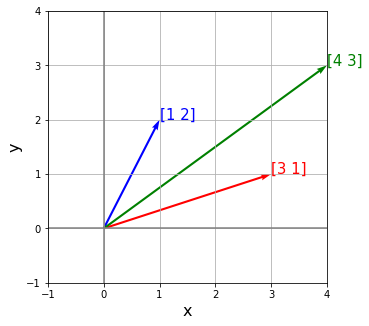

In [5]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

ax.grid()

ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)

ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)

ax.axhline(0, color = "gray")
ax.axvline(0, color = "gray")

vec_pic(a, "r")
vec_pic(b, "b")
vec_pic(a + b, "g")

plt.show();

内積とノルム

In [6]:
print("a . b = ", np.dot(a, b)) # a.dot(b)
print("||a|| = ", np.linalg.norm(a, ord=2)) # math.sqrt(a.dot(a))
print("||b|| = ", np.linalg.norm(b, ord=2))

a . b =  5
||a|| =  3.1622776601683795
||b|| =  2.23606797749979


身長と体重データ

In [7]:
x = np.array([152.8, 150.1, 182, 163.2, 167.3, 160.2, 164.9, 161.4, 179.9, 172.2])
y = np.array([56.3, 52.1, 85.6, 66.8, 74.2, 58.1, 61.9, 55.1, 70.5, 64.1])

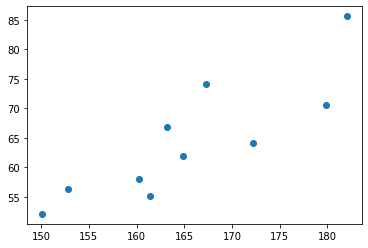

In [8]:
plt.scatter(x, y)
plt.show();

センタリングを行う．

In [9]:
x_cen = x - np.mean(x)
y_cen = y - np.mean(y)

共分散と相関係数

In [10]:
s_xy = np.dot(x_cen, y_cen) / len(x_cen)
s_x = np.linalg.norm(x_cen, ord=2) / math.sqrt(len(x_cen))
s_y = np.linalg.norm(y_cen, ord=2) / math.sqrt(len(y_cen))

print("s_xy =", s_xy)
print("s_x =", s_x)
print("s_y =", s_y)
print("r_xy =", s_xy / (s_x * s_y))

s_xy = 81.31300000000002
s_x = 9.882509802676646
s_y = 9.684115860521286
r_xy = 0.8496357031773516


## 13章　行列

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [12]:
A = np.array([[2, 1, -3], [4, -6, 5]])
B = np.array([[1, 3, 4], [3, 0, -1]])

転置は`numpy`オブジェクトの`transpose()`メソッド．

In [13]:
A.transpose() # A.T

array([[ 2,  4],
       [ 1, -6],
       [-3,  5]])

和・差・スカラー倍

In [14]:
A + B

array([[ 3,  4,  1],
       [ 7, -6,  4]])

In [15]:
A - B

array([[ 1, -2, -7],
       [ 1, -6,  6]])

In [16]:
2 * A + 3 * B

array([[  7,  11,   6],
       [ 17, -12,   7]])

積

In [17]:
np.dot(A, B.transpose()) # A.dot(B.transpose())

array([[-7,  9],
       [ 6,  7]])

In [18]:
np.dot(A.transpose(), B)

array([[ 14,   6,   4],
       [-17,   3,  10],
       [ 12,  -9, -17]])

行列の積の幾何学的表現

In [19]:
P = np.array([[2, 1], [-1, 3]])

In [20]:
def vec_pic(vec, color = "black"):
    ax.quiver(0, 0, vec[0], vec[1], color = color,
            angles = 'xy', scale_units = 'xy', scale = 1)
    ax.text(vec[0], vec[1], str(vec), color = color, size = 15)

In [21]:
a = np.array([1, 1])
b = np.array([0, 1])
P.dot(a), P.dot(b)

(array([3, 2]), array([1, 3]))

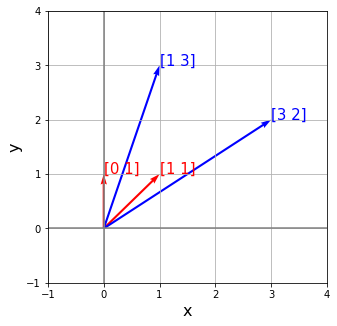

In [22]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

ax.grid()

ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)

ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)

ax.axhline(0, color = "gray")
ax.axvline(0, color = "gray")

vec_pic(a, "r")
vec_pic(b, "r")
vec_pic(P.dot(a), "b")
vec_pic(P.dot(b), "b")

plt.show();

座標全体の線形変換

In [23]:
cardesian = np.array([[x, y] for x in range(-10,11) for y in range(-10,11)])

In [24]:
transformed = P.dot(cardesian.T).T
transformed.shape

(441, 2)

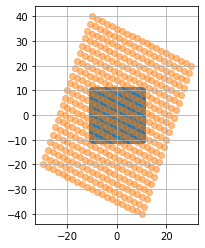

In [25]:
plt.axes().set_aspect('equal')
plt.scatter(cardesian[:,0], cardesian[:,1])
plt.scatter(transformed[:,0], transformed[:,1], alpha = 0.5)
plt.grid(True)
plt.show();

分散共分散行列

In [26]:
x = np.array([152.8, 150.1, 182, 163.2, 167.3, 160.2, 164.9, 161.4, 179.9, 172.2])
y = np.array([56.3, 52.1, 85.6, 66.8, 74.2, 58.1, 61.9, 55.1, 70.5, 64.1])
x_cen = x - np.mean(x)
y_cen = y - np.mean(y)
X = np.array([x_cen, y_cen]).T
X.shape

(10, 2)

In [27]:
X.shape[0] **(-1) * (X.T).dot(X)

array([[97.664 , 81.313 ],
       [81.313 , 93.7821]])